In [1]:
from autolens.profiles import mass_profiles
from autolens.profiles import light_profiles
from autolens.lensing import galaxy
from autolens.imaging import mask
from autolens.plotting import imaging_plotters
from autolens.plotting import profile_plotters

# In this example, we'll create a grid of Cartesian (y,x) coordinates and pass it to the 'light_profiles' 
# module to create images on this grid and the 'mass_profiles' module to create deflection-angle maps on this grid. 

In [2]:
# Lets use the a same resolution grid as the previous tutorial but make it 100 x 100 (if you skipped that 
# tutorial, I recommend you go back to it!)
image_grids = mask.ImagingGrids.from_shape_and_pixel_scale(shape=(100, 100), pixel_scale=0.05, 
                                                           sub_grid_size=2)

In [3]:
# Next, lets create a light profile using the 'light_profiles' module. We'll use a Sersic function, 
# which is a analytic function often use to depict galaxies.
sersic_light_profile = light_profiles.EllipticalSersic(centre=(2.0, 1.0), axis_ratio=0.8, phi=45.0,
                                                       intensity=1.0, effective_radius=1.0, sersic_index=2.5)
# We can print a profile to confirm its parameters.
print(sersic_light_profile)

EllipticalSersic
centre: (2.0, 1.0)
axis_ratio: 0.8
phi: 45.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 2.5


In [4]:
# We can pass a grid to a light profile to compute the intensity of at every coordinate on the grid.
# (The resulting image comes back on the same 1D NumPy arrays as the grid, again for memory efficiency)
light_profile_intensities = sersic_light_profile.intensities_from_grid(grid=image_grids.image)
print('intensity of image-pixel 1:')
print(light_profile_intensities[0])
print('intensity of image-pixel 2:')
print(light_profile_intensities[1])
print()

# The 1D flattening occurs from the top-left pixel, and goes rightwards and downwards. Thus, because the 
# light profile is centered at (0.0, 0.0), the central pixels are the brightest.
print('intensity of central image-pixels:')
print(light_profile_intensities[4949])
print(light_profile_intensities[4950])
print(light_profile_intensities[5049])
print(light_profile_intensities[5050])


intensity of image-pixel 1:
0.04189641523797503
intensity of image-pixel 2:
0.04374944008398025

intensity of central image-pixels:
0.2139224291964037
0.21768248978167098
0.20280515120326098
0.20618046630076836


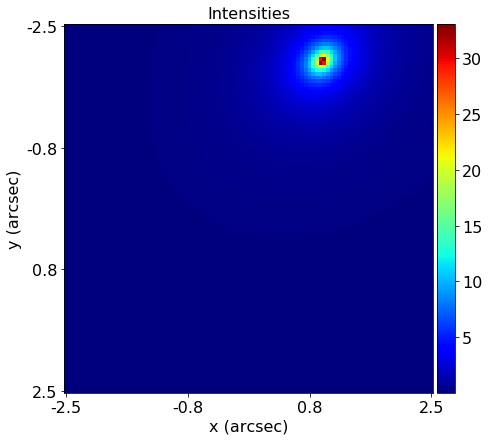

In [5]:
# We can use a profile plotter to plot this intensity map (the image is mapped to 2D before plotting).
profile_plotters.plot_intensities(light_profile=sersic_light_profile, grid=image_grids.image)

In [6]:
# Lets create a singular isothermal sphere (SIS) mass-profile using the 'mass-profiles' module.
sis_mass_profile = mass_profiles.SphericalIsothermal(centre=(0.1, 0.1), einstein_radius=1.6)
print(sis_mass_profile)

SphericalIsothermal
centre: (0.1, 0.1)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.6
slope: 2.0
core_radius: 0.0


In [7]:
# Just like above, we can pass a grid to a mass-profile to compute its deflection angles (Yep, still in 1D)
mass_profile_deflections = sis_mass_profile.deflections_from_grid(grid=image_grids.image)
print('deflection-angles of image-pixel 1:')
print(mass_profile_deflections[0])
print('deflection-angles of image-pixel 2:')
print(mass_profile_deflections[1])
print()
print('deflection-angles of central image-pixels:')
print(mass_profile_deflections[4949])
print(mass_profile_deflections[4950])
print(mass_profile_deflections[5049])
print(mass_profile_deflections[5050])


deflection-angles of image-pixel 1:
[ 1.08477382 -1.17612319]
deflection-angles of image-pixel 2:
[ 1.09622353 -1.1654587 ]

deflection-angles of central image-pixels:
[-0.82319321 -1.37198868]
[-1.13137085 -1.13137085]
[-1.13137085 -1.13137085]
[-1.37198868 -0.82319321]


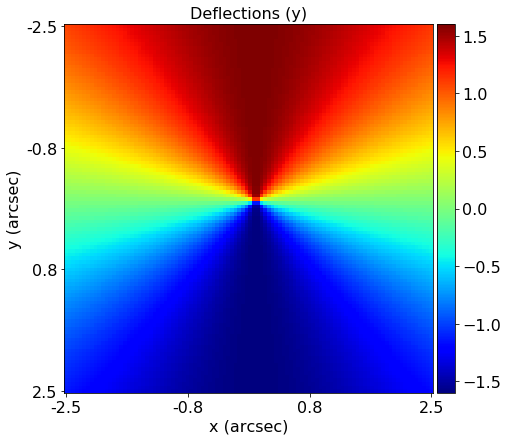

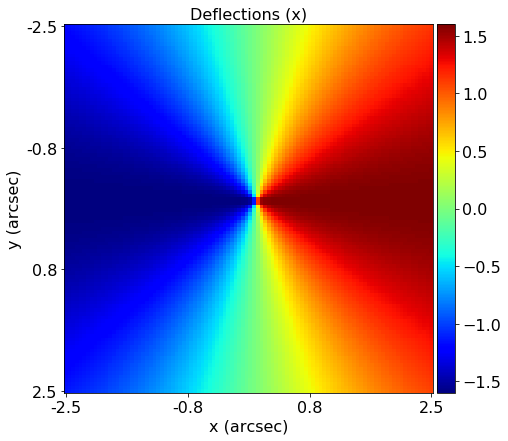

In [8]:
# And again, a profile plotter can plot these deflection angles in 2D.
profile_plotters.plot_deflections_y(mass_profile=sis_mass_profile, grid=image_grids.image)
profile_plotters.plot_deflections_x(mass_profile=sis_mass_profile, grid=image_grids.image)

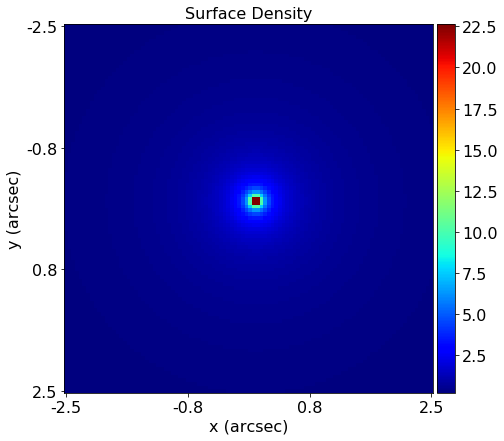

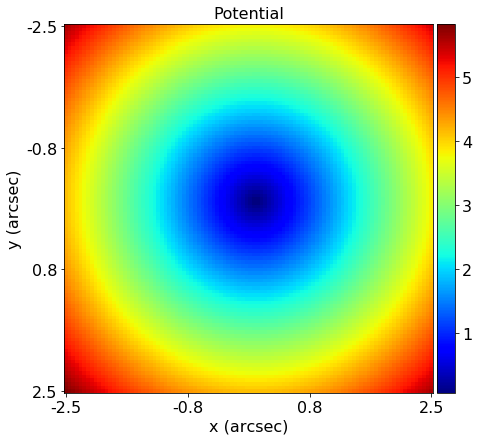

In [9]:
# Mass-profiles also have a surface-density and gravitational potential
mass_profile_surface_density = sis_mass_profile.surface_density_from_grid(grid=image_grids.image)
mass_profile_potential = sis_mass_profile.potential_from_grid(grid=image_grids.image)
profile_plotters.plot_surface_density(mass_profile=sis_mass_profile, grid=image_grids.image)
profile_plotters.plot_potential(mass_profile=sis_mass_profile, grid=image_grids.image)

In [10]:
# Congratulations, you've completed your second PyAutoLens tutorial! Before moving on to the next one, experiment with
# PyAutoLens by doing the following:
#
# 1) Change the light profile's effective radius and Sersic index - how does the image's appearance change?
# 2) Change the mass profile's einstein radius - what happens to the deflection angles, potential and surface density?
# 3) Experiment with different light-profiles and mass-profiles in the light_profiles and mass_profiles modules.
#    In particular, use the EllipticalIsothermal profile to introduce ellipticity into a mass profile.